# Collider Bias

Here is a simple mnemonic example to illustate the collider or M-bias. 

Here the idea is that people who get to Hollywood have to have high congenility = talent + beauty.  Funnily enough this induces a negative correlation between talents and looks, when we condition on the set of actors or celebrities.  This simple example explains an anecdotal observation that "talent and beaty are negatively correlated" for celebrities.  

In [1]:
install.packages("dagitty")
library(dagitty)

Installing package into ‘/home/runner/work/_temp/Library’
(as ‘lib’ is unspecified)



Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



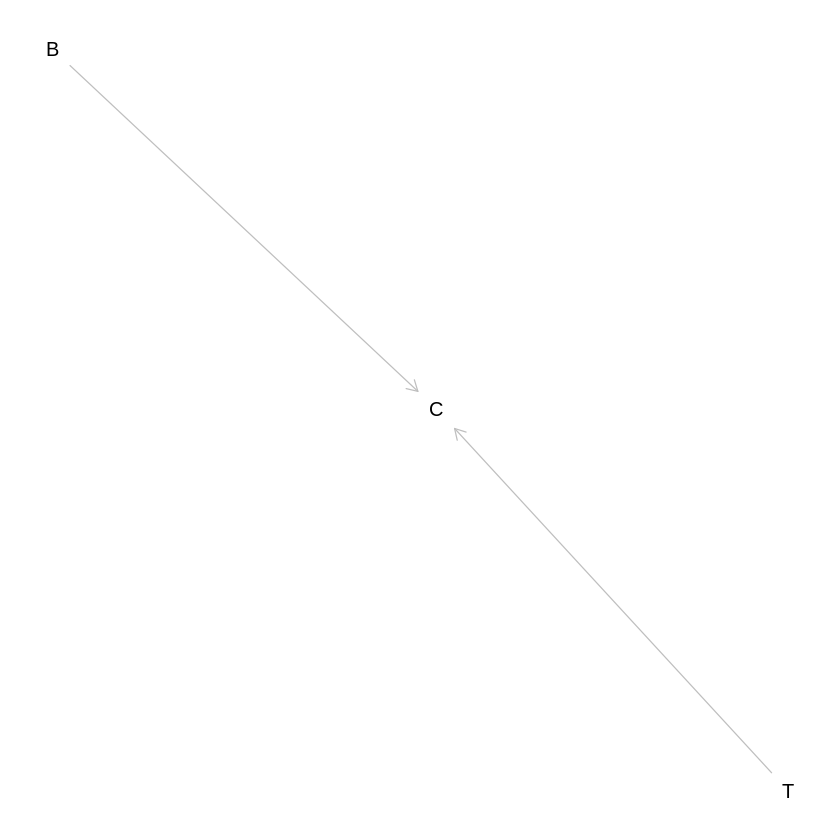

In [2]:
g <- dagitty( "dag{ T -> C <- B }" )
plot(g)

In [3]:
#collider bias
n=1000000
T = rnorm(n)   #talent
B = rnorm(n)   #beaty
C = T+B + rnorm(n) #congeniality
T.H= subset(T, C>0) # condition on C>0
B.H= subset(B, C>0) # condition on C>0

summary(lm(T~ B))  #regression of T on B
summary(lm(T~ B +C)) #regression of T on B and C
summary(lm(T.H~ B.H)) #regression of T on B, conditional on C>0.


Call:
lm(formula = T ~ B)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8970 -0.6734 -0.0008  0.6748  4.8049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.0007913  0.0009990   0.792    0.428
B           0.0012579  0.0009990   1.259    0.208

Residual standard error: 0.999 on 999998 degrees of freedom
Multiple R-squared:  1.585e-06,	Adjusted R-squared:  5.854e-07 
F-statistic: 1.585 on 1 and 999998 DF,  p-value: 0.208



Call:
lm(formula = T ~ B + C)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2564 -0.4760  0.0005  0.4765  3.3179 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  0.0004564  0.0007067    0.646    0.518    
B           -0.4992045  0.0008661 -576.396   <2e-16 ***
C            0.4993691  0.0004997  999.386   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7067 on 999997 degrees of freedom
Multiple R-squared:  0.4997,	Adjusted R-squared:  0.4997 
F-statistic: 4.994e+05 on 2 and 999997 DF,  p-value: < 2.2e-16



Call:
lm(formula = T.H ~ B.H)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9372 -0.5844 -0.0201  0.5641  4.4739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.58542    0.00136   430.4   <2e-16 ***
B.H         -0.27052    0.00136  -198.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8539 on 500288 degrees of freedom
Multiple R-squared:  0.07328,	Adjusted R-squared:  0.07328 
F-statistic: 3.956e+04 on 1 and 500288 DF,  p-value: < 2.2e-16


We can also use package Dagitty to illustrate collider bias, also known as M-bias.

In [4]:
## If we want to infer causal effec of B on T,
## we can apply the command to figure out 
## variables we should condition on:

adjustmentSets( g, "T", "B" ) 

## empty set -- we should not condition on the additional
## variable C.

## Generate data where C = .5T + .5B
set.seed( 123); d <- simulateSEM( g, .5 )
confint( lm( T ~ B, d ) )["B",] # includes 0
confint( lm( T ~ B + C, d ) )["B",] # does not include 0


 {}

2.5 %      97.5 % 
-0.15524753  0.03313395

2.5 %     97.5 % 
-0.4840231 -0.3094251